In [1]:
import pandas as pd

# Preparando para a conversão do arquivo auto-mpg.data para CSV
colunas = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

# Lê o arquivo original com separação por espaços e trata "?" como NaN
df = pd.read_csv(
    "auto-mpg.data",
    delim_whitespace=True,
    names=colunas,
    na_values="?"
)


In [2]:
print(df.info())
print(df.head())

# Se quiser, pode remover valores faltantes agora
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17

In [3]:
# Conversão para csv
df.to_csv("auto-mpg.csv", index=False)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_wine = pd.read_csv('auto-mpg.csv', sep=',')

df_wine.tail()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
391,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [5]:
# Imports

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")
RANDOM_STATE = 42

In [6]:
# Divisão treino / teste
# 70% treino / 30% teste

# Variáveis de entrada (X) e saída (y)
X = df_wine.drop(['mpg'], axis=1)
y = df_wine['mpg']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
    # test_size=0.3 indica que 30% dos dados vão para teste, e o restante (70%) para treino.
)

def avaliar_modelo(nome, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\nModelo: {nome}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    return {'Modelo': nome, 'RMSE': rmse, 'MAE': mae, 'R2': r2}


In [7]:
# coluna car_name não é numérica, então vamos removê-la
X = df.drop(columns=["mpg", "car_name"])
y = df["mpg"]

# padronização dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Pré-processamento dos Dados

Para este experimento, foi aplicada a **padronização (z-score normalization)** aos atributos de entrada para os modelos lineares (**Regressão Linear** e **Ridge Regression**). 

A padronização transforma os dados para que tenham média 0 e desvio padrão 1, o que é essencial para modelos que são sensíveis à escala dos atributos. 

Modelos baseados em árvores, como **Árvore de Decisão** e **Random Forest**, não exigem essa transformação, pois são invariantes à escala.

A transformação foi aplicada apenas aos dados de treino, e depois replicada nos dados de teste para evitar vazamento de informação.


In [8]:
# COM HIPERPARAMETROS

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_svr = {
    'C': uniform(1, 1000),
    'epsilon': uniform(0.01, 1.0),
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

rand_svr = RandomizedSearchCV(SVR(), param_svr, n_iter=50, cv=5, 
                              scoring='neg_root_mean_squared_error', random_state=42)
rand_svr.fit(X_train_scaled, y_train)

best_svr = rand_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)
res_svr = avaliar_modelo("SVR ", y_test, y_pred_svr)



Modelo: SVR 
RMSE: 2.5018
MAE: 1.8939
R²: 0.8817


In [9]:
from scipy.stats import loguniform

param_ridge = {
    'alpha': loguniform(0.001, 1000)
}

rand_ridge = RandomizedSearchCV(Ridge(), param_ridge, n_iter=50, cv=5,
                                scoring='neg_root_mean_squared_error', random_state=42)
rand_ridge.fit(X_train_scaled, y_train)

best_ridge = rand_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)
res_ridge = avaliar_modelo("Ridge Regression", y_test, y_pred_ridge)



Modelo: Ridge Regression
RMSE: 3.1909
MAE: 2.4587
R²: 0.8075


In [10]:
param_tree = {
    'max_depth': [None] + list(range(5, 51, 5)),
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10]
}

rand_tree = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_tree, 
                               n_iter=50, cv=5, scoring='neg_root_mean_squared_error', random_state=42)
rand_tree.fit(X_train, y_train)

best_tree = rand_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)
res_tree = avaliar_modelo("Árvore de Decisão ", y_test, y_pred_tree)



Modelo: Árvore de Decisão 
RMSE: 3.0406
MAE: 2.3229
R²: 0.8252


In [11]:
param_rf = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [None] + list(range(10, 61, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rand_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_rf, 
                             n_iter=50, cv=5, scoring='neg_root_mean_squared_error', random_state=42)
rand_rf.fit(X_train, y_train)

best_rf = rand_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
res_rf = avaliar_modelo("Random Forest", y_test, y_pred_rf)



Modelo: Random Forest
RMSE: 2.5468
MAE: 1.8573
R²: 0.8774


In [12]:
resultados = pd.DataFrame([res_svr, res_ridge, res_tree, res_rf])
resultados.sort_values("RMSE")


,Modelo,RMSE,MAE,R2
0,SVR,2.501798,1.893855,0.881693
3,Random Forest,2.546829,1.857297,0.877396
2,Árvore de Decisão,3.040627,2.322944,0.825245
1,Ridge Regression,3.190853,2.458675,0.807550


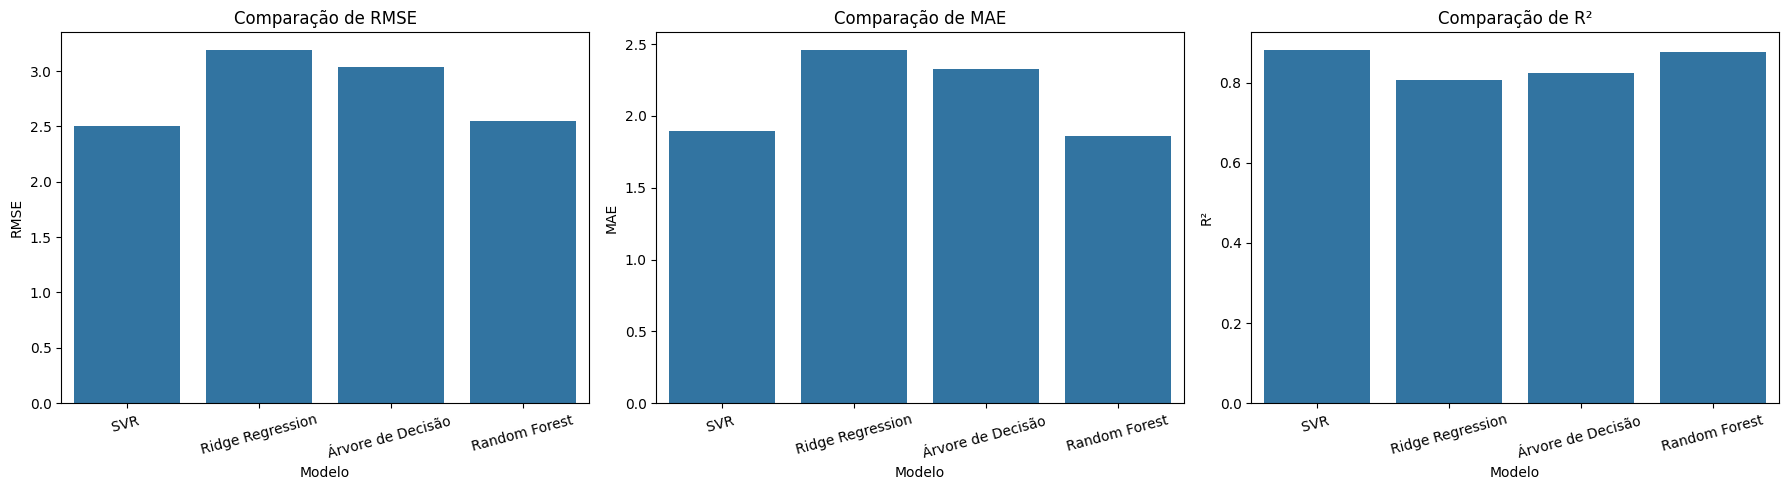

In [13]:
# Gráfico de barras para RMSE, MAE, R²
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# RMSE
sns.barplot(x="Modelo", y="RMSE", data=resultados, ax=axs[0])
axs[0].set_title("Comparação de RMSE")
axs[0].set_ylabel("RMSE")
axs[0].tick_params(axis='x', rotation=15)

# MAE
sns.barplot(x="Modelo", y="MAE", data=resultados, ax=axs[1])
axs[1].set_title("Comparação de MAE")
axs[1].set_ylabel("MAE")
axs[1].tick_params(axis='x', rotation=15)

# R²
sns.barplot(x="Modelo", y="R2", data=resultados, ax=axs[2])
axs[2].set_title("Comparação de R²")
axs[2].set_ylabel("R²")
axs[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


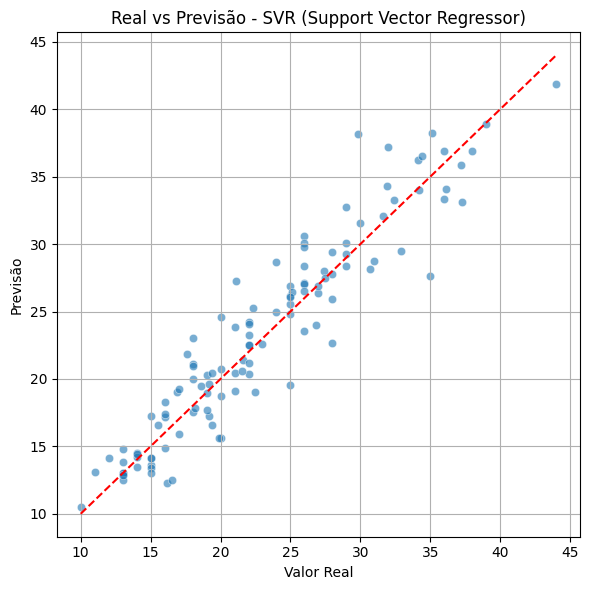

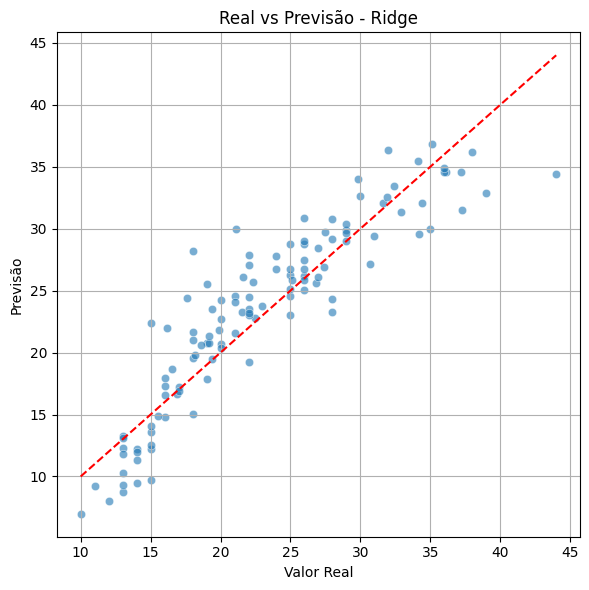

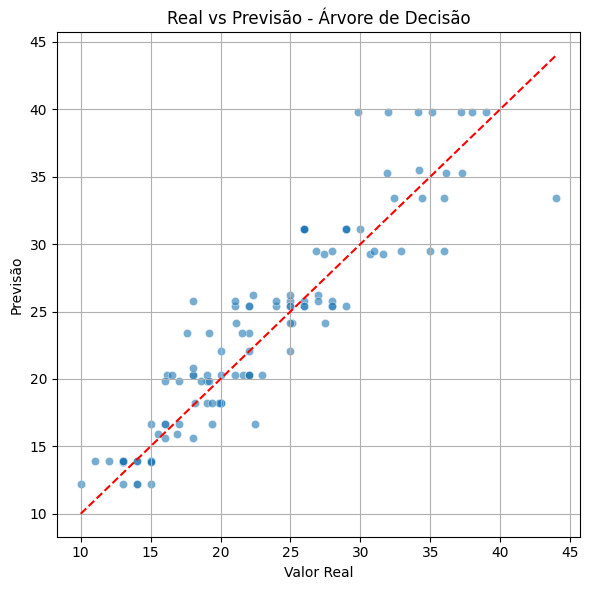

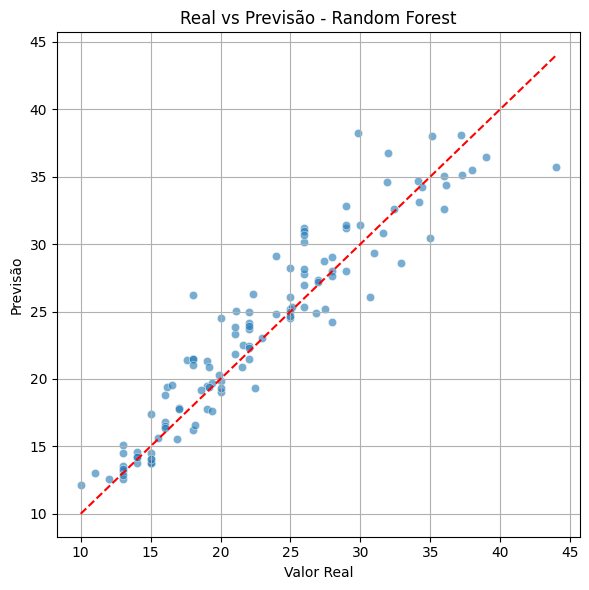

In [14]:
def plot_predicoes(y_true, y_pred, nome_modelo):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Valor Real")
    plt.ylabel("Previsão")
    plt.title(f"Real vs Previsão - {nome_modelo}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gerando gráficos para cada modelo
plot_predicoes(y_test, y_pred_svr, "SVR (Support Vector Regressor)")
plot_predicoes(y_test, y_pred_ridge, "Ridge")
plot_predicoes(y_test, y_pred_tree, "Árvore de Decisão")
plot_predicoes(y_test, y_pred_rf, "Random Forest")


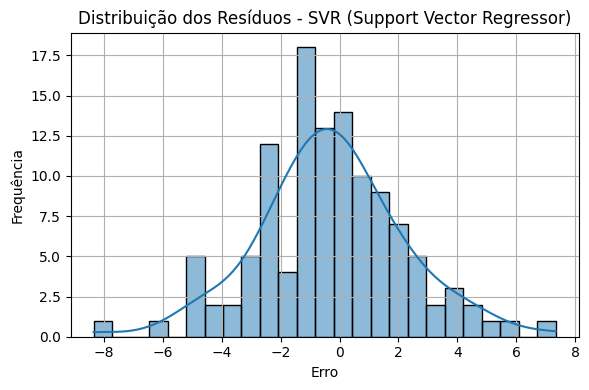

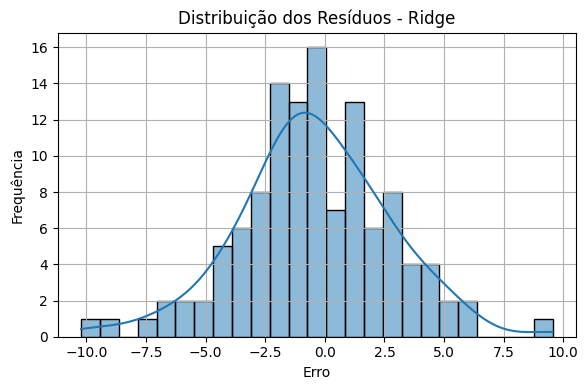

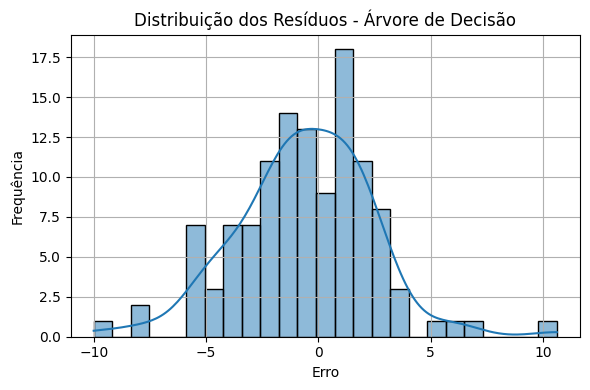

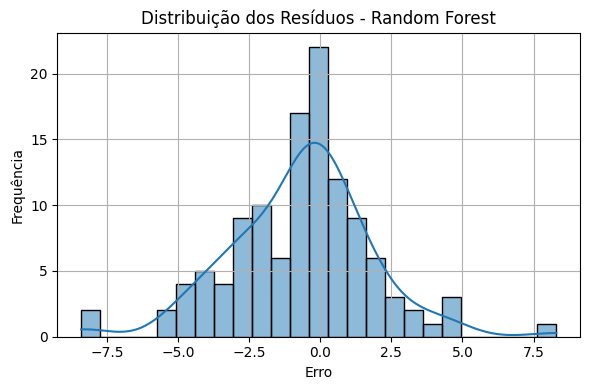

In [15]:
def plot_residuos(y_true, y_pred, nome_modelo):
    erros = y_true - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(erros, kde=True, bins=25)
    plt.title(f"Distribuição dos Resíduos - {nome_modelo}")
    plt.xlabel("Erro")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_residuos(y_test, y_pred_svr, "SVR (Support Vector Regressor)")
plot_residuos(y_test, y_pred_ridge, "Ridge")
plot_residuos(y_test, y_pred_tree, "Árvore de Decisão")
plot_residuos(y_test, y_pred_rf, "Random Forest")



In [16]:
import numpy as np

# Exemplo para regressao.ipynb (com hiperparâmetros)
np.savez('resultados_com_hp_2.npz',
         y_test=y_test,
         y_pred_svr=y_pred_svr,
         y_pred_ridge=y_pred_ridge,
         y_pred_tree=y_pred_tree,
         y_pred_rf=y_pred_rf)